# Imports:

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from sonipy.sonify import SonifyTool

print('done')

done


# Utils:

In [43]:
C4 = 261.6 # Hz

def plot_raw_data(arr, sensor_name, figsize=(30, 10), hourly=True):
    plt.figure(figsize=figsize)
    plt.plot(np.arange(arr.shape[0]), arr, c='b')
    plt.title("LIT-101 durant l'attaque")
    plt.ylabel(sensor_name)
    
    if hourly:
        plt.xticks(np.arange(start=0, stop=3600 * 24, step=3600), np.array(['{}H'.format(x) for x in range(24)]))
    plt.show()

def sonify(x, filename, frequency_min, frequency_max, duration_constraint=False, duration=5000, save=True):
    """Sonifies the numpy array x, and returns it's Tone.

    Args:
        x ([numpy.array]): [input data array]
        filename ([string]): [description]
        frequency_min ([float32]): [minimum frequency]
        frequency_max ([float32]): [maximum frequency]
        duration_constraint (bool, optional): [apply duration constraint ? if yes, specify duration]. Defaults to False.
        duration (int, optional): [duration of output audio]. Defaults to 5000.
        save (bool, optional): [save file?]. Defaults to True.
    """
    frequency_args = {
        'frequency_min' : frequency_min,
        'frequency_max' : frequency_max
    }

    duration_args = {
        'time_total' : duration, # ms
    }

    duration_scale = 1. / 5000. # x value / time (ms)

    Tone = SonifyTool(np.arange(x.shape[0]), x,
                        frequency_args = frequency_args,
                        duration_args = duration_args,
                    )
    Tone.play()
    if save:
        Tone.save('.', filename)
    return Tone

In [41]:
df = pd.read_csv('./SWaT.Dataset/SWaT_Dataset_Attack_v0.csv', sep=';')
data = df['LIT101'].apply(lambda x: x.replace(',', '.')).astype('float32')
data.describe()

C:\Users\madia\.conda\envs\deeplearning\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,9,28,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


count    449919.000000
mean        607.019897
std         125.303001
min         189.826294
25%         510.011108
50%         530.422485
75%         727.432129
max         925.032288
Name: LIT101, dtype: float64

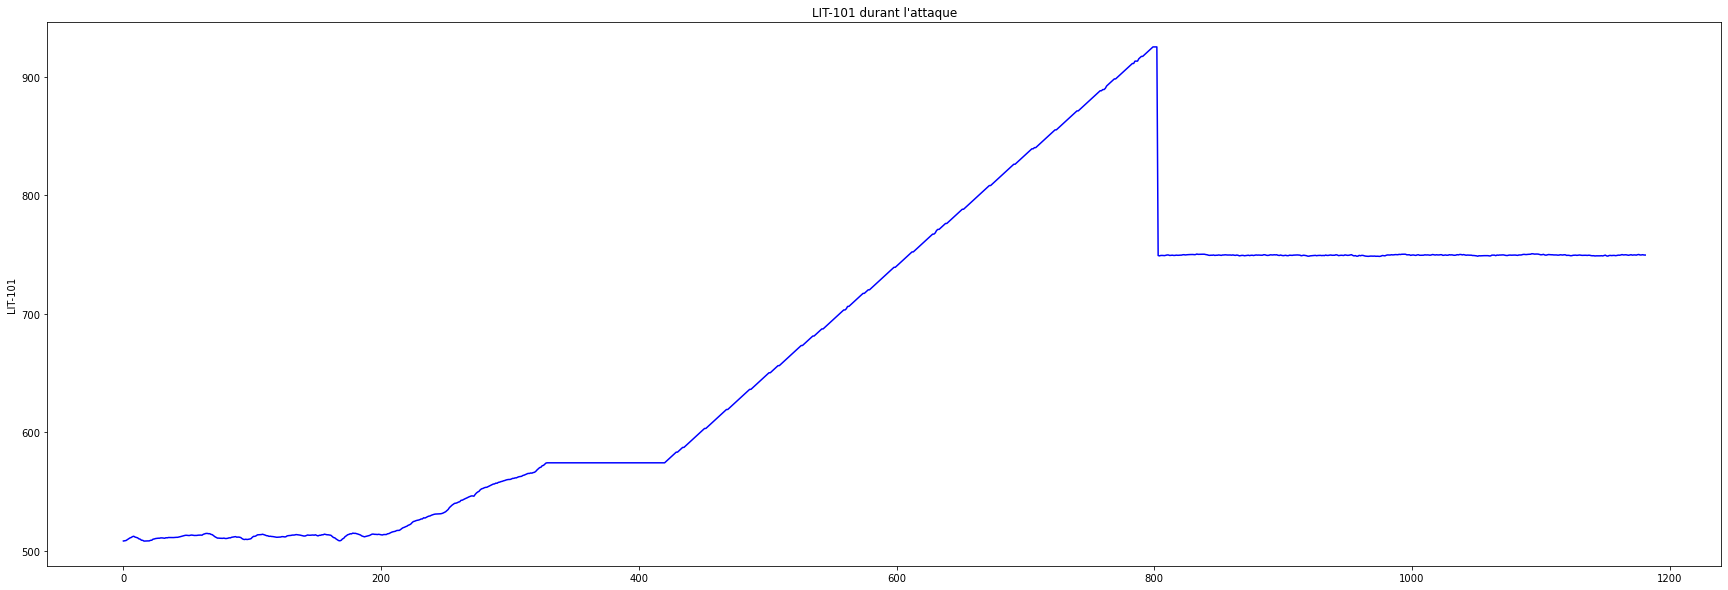

C:\Users\madia\.conda\envs\deeplearning\lib\site-packages\sonipy\thinkdsp.py:734: UserWarning: Can't add these waveforms; their time arrays don't line up.
  "Can't add these waveforms; their " "time arrays don't line up."
multitones created
Writing .\tones/LIT101_Attack_raw.wav
Saved multitone as .\tones/LIT101_Attack_raw.wav.


In [44]:
data = df['LIT101'].apply(lambda x: x.replace(',', '.')).astype('float32')
# 4480 : un peu avant le début de l'attaque
# 5662 : un peu après
plot_raw_data(data.values[4480: 5662], 'LIT-101', hourly=False)
Tone = sonify(data.values[4480: 5662], 'LIT101_Attack_raw.wav', C4, C4 * 7, duration_constraint=True, duration=5000, save=True)

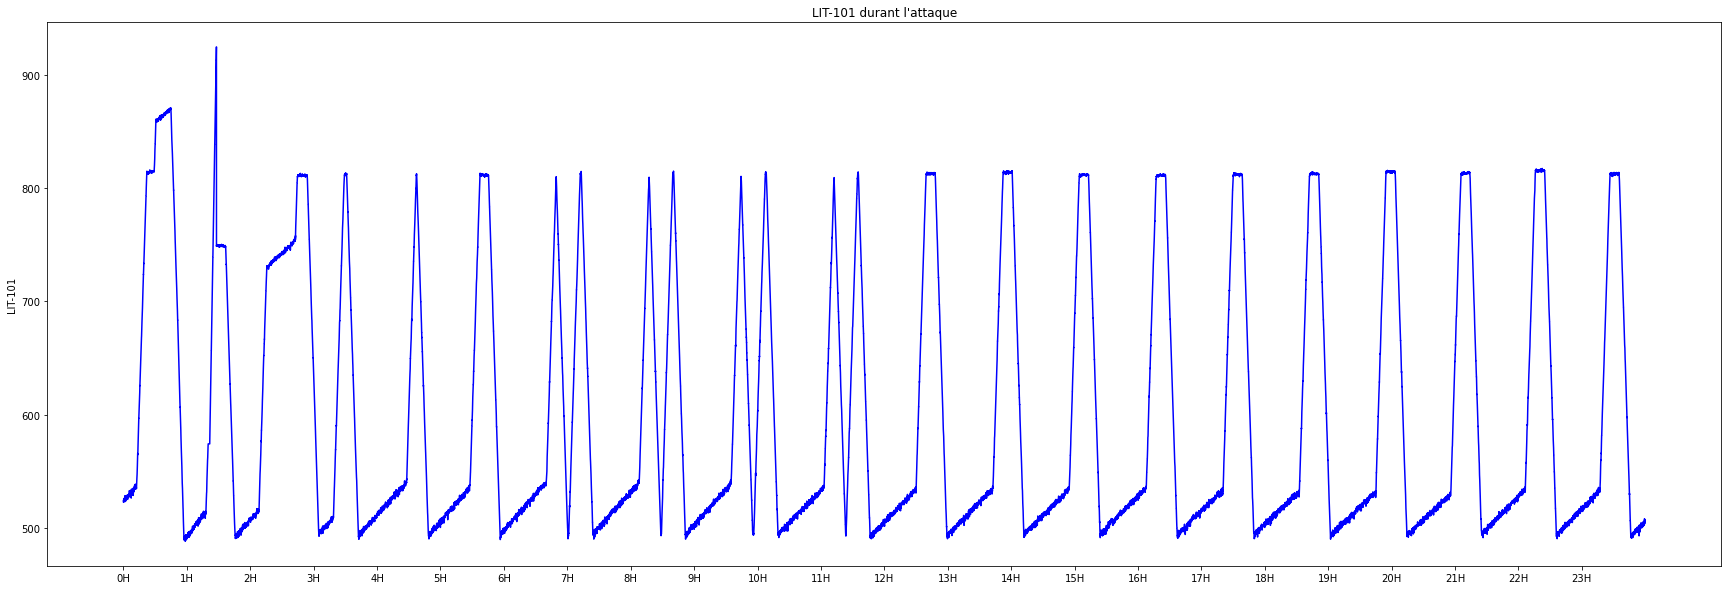

In [45]:
data = df['LIT101'].apply(lambda x: x.replace(',', '.')).astype('float32')
plot_raw_data(data.values[:3600 * 24], 'LIT-101', hourly=True)
# Tone = sonify(data.values[:3600 * 24], 'LIT101_24H_Attack_raw.wav', C4, C4 * 10, duration_constraint=True, duration=30000, save=True)

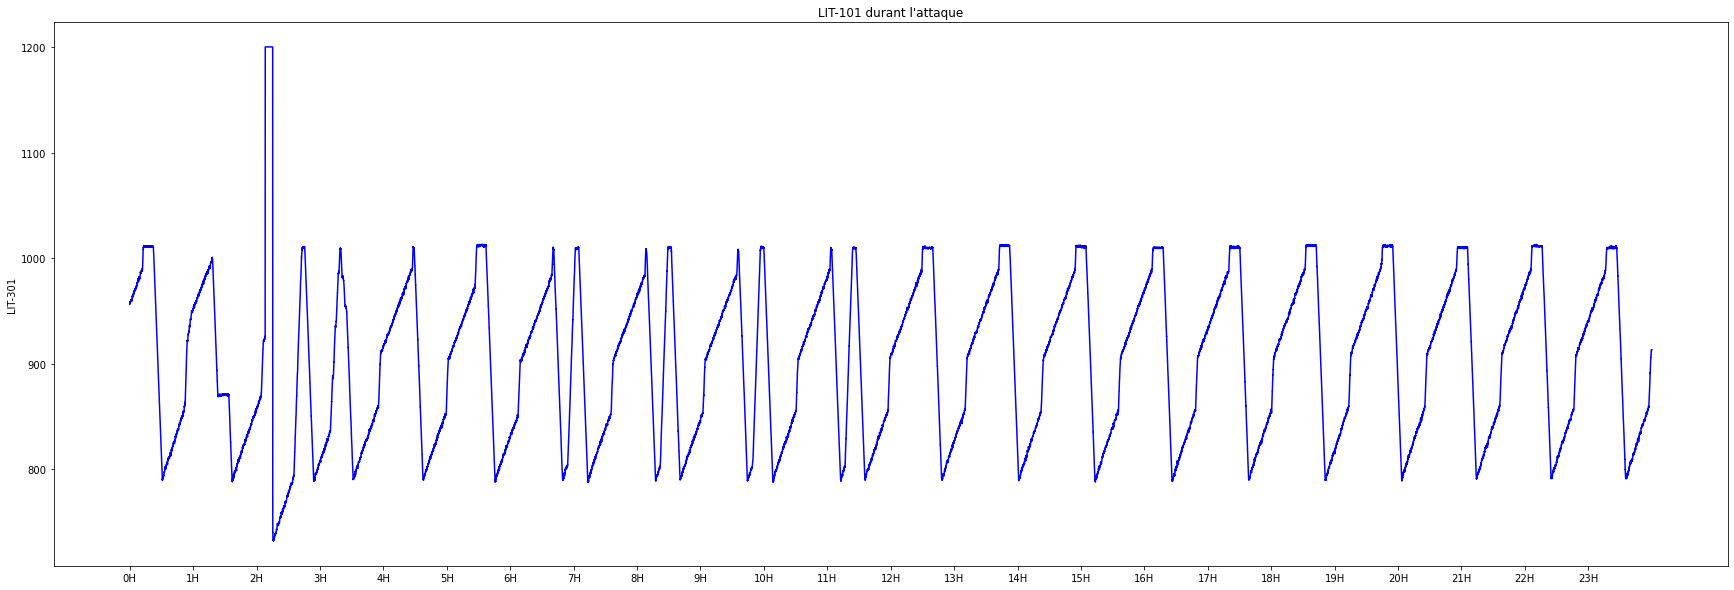

In [46]:
data = df['LIT301'].apply(lambda x: x.replace(',', '.')).astype('float32')
plot_raw_data(data.values[:3600 * 24], 'LIT-301', hourly=True)
# Tone = sonify(data.values[:3600 * 24], 'LIT101_24H_Attack_raw.wav', C4, C4 * 10, duration_constraint=True, duration=30000, save=True)